In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.oneway import anova_oneway
from pingouin import pairwise_gameshowell, anova, welch_anova, pairwise_tukey

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [11]:
df = pd.read_excel("./data/reading.xlsx")
df.head()

,독서방법,점수
0,B,7.7
1,B,1.5
2,B,4.3
3,B,5.4
4,B,4.3


- Welch 검정 : 등분산을 만족하지 못할때 적용하는 분산분석
  - statsmodels.stats.oneway.anova_oneway에서 Welch 검정을 수행할 수 있음.
    - 이름과는 다르게 기본 설정이 F검정이 아닌 Welch 검정임
    - welch_correction은 True, use_var = 'unequal'을 설정하면 등분산성을 만족하지 않는 Welch 검정 수행(default)
  - pingouin.welch_anova : pingouin의 Welch 검정을 위한 함수
    - welch_anova(data = 데이터 원본, dv = 종속변수, between = 독립변수)
    - pingouin.anova도 statsmodels와 동일한 분산분석을 지원, Welch 검정과 동일한 사용 방법
    - pingouin에서도 tukey 사후검정을 지원 (pingouin.pairwise_tukey)

In [23]:
k = anova_oneway(df['점수'], groups = df['독서방법'], use_var = 'unequal', welch_correction = True)
k

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 10.787454902442088
pvalue = 0.00013434653590208693
df = (2.0, 48.20412768831073)
df_num = 2.0
df_denom = 48.20412768831073
nobs_t = 90.0
n_groups = 3
means = array([ 5.73214286,  6.69333333, 12.53125   ])
nobs = array([28., 30., 32.])
vars_ = array([10.13115079,  2.87857471, 56.35770161])
use_var = 'unequal'
welch_correction = True
tuple = (10.787454902442088, 0.00013434653590208693)

In [13]:
welch_anova(data = df, dv = '점수', between = '독서방법')

,Source,ddof1,ddof2,F,p-unc,np2
0,독서방법,2,48.204128,10.787455,0.000134,0.283461


- gameshowell 검정 : 등분산성을 만족하지 않는 사후검정이며, pingouin 패키지만 지원

In [26]:
pairwise_gameshowell(data = df, dv = '점수', between = '독서방법')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,B,D,5.732143,6.693333,-0.961190,0.676594,-1.420631,40.563109,0.339976,-0.375556
1,B,G,5.732143,12.531250,-6.799107,1.457054,-4.666340,42.964012,0.000088,-1.136960
2,D,G,6.693333,12.531250,-5.837917,1.362766,-4.283874,34.360873,0.000403,-1.043650


In [29]:
df2 = pd.read_excel("./data/commercial.xlsx")
df2.head()

,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166


In [30]:
df2['sales_amount_log'] = np.log(df2['sales_amount'])

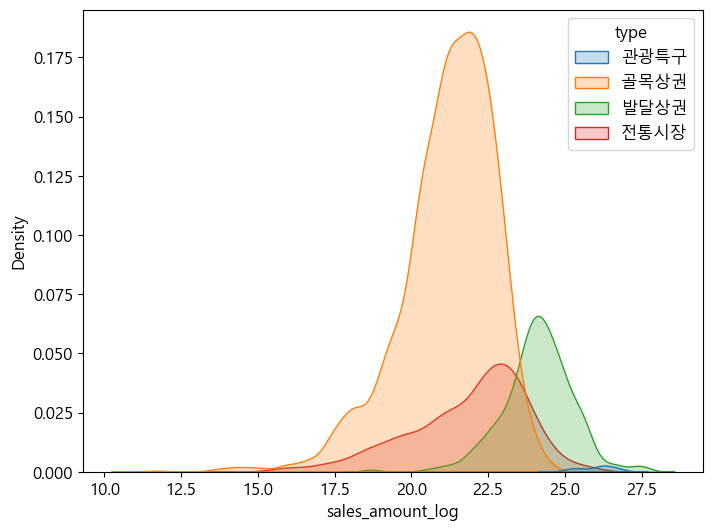

In [33]:
plt.figure()
sns.kdeplot(data = df2, hue = 'type', x = 'sales_amount_log', fill = True)
plt.show()

- 로그변환을 했을 때 불만족했던 정규성이 만족되면 로그변환된 데이터로 분석하는 것이 좋음
  - 정규성 or 등분산성 가정을 만족하지 않으므로 비모수적 통계기법인 Welch 검정 사용

In [35]:
welch_anova(data = df2, dv = 'sales_amount_log', between = 'type')

,Source,ddof1,ddof2,F,p-unc,np2
0,type,3,117.954981,1842.976509,7.053276e-99,0.319485


In [39]:
result_g = pairwise_gameshowell(data = df2, dv = 'sales_amount_log', between = 'type')
result_g['result'] = result_g['pval'] <= 0.05
result_g

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,result
0,골목상권,관광특구,21.188783,26.018229,-4.829446,0.116139,-41.583473,25.192873,2.220446e-15,-3.087560,True
1,골목상권,발달상권,21.188783,24.111665,-2.922882,0.044081,-66.306856,1987.319203,0.000000e+00,-1.953267,True
2,골목상권,전통시장,21.188783,21.846978,-0.658194,0.062833,-10.475263,1527.837271,0.000000e+00,-0.398660,True
3,관광특구,발달상권,26.018229,24.111665,1.906565,0.119291,15.982446,28.035019,1.121325e-14,1.661959,True
4,관광특구,전통시장,26.018229,21.846978,4.171252,0.127418,32.736855,36.449092,0.000000e+00,2.183914,True
5,발달상권,전통시장,24.111665,21.846978,2.264687,0.068485,33.068280,1844.617220,0.000000e+00,1.407066,True


In [42]:
df2_2 = df2[['quarter', 'type', 'sales_amount']].copy()
df2_2.head()

,quarter,type,sales_amount
0,1,관광특구,72523644100
1,1,관광특구,283332346393
2,1,관광특구,81696730221
3,1,관광특구,212062656625
4,1,관광특구,231338386876


In [43]:
df2_2['sales_amount_log'] = np.log(df2_2['sales_amount'])

In [60]:
lm = ols('sales_amount_log ~ C(quarter)*C(type)', data = df2_2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sales_amount_log   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     196.2
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:47:57   Log-Likelihood:                -11660.
No. Observations:                6222   AIC:                         2.335e+04
Df Residuals:                    6206   BIC:                         2.346e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          21.0425      0.049    426.241      0.000      20.946      21.139
C(quarter)[T.2]                     0.1730      0.070      2.479      0.013       0.036       0.310
C(quarter)[T.3]                     0.1779      0.070      2.549      0.011       0.041       0.315
C(quarter)[T.4]                     0.2342      0.070      3.356      0.001       0.097       0.371
C(type)[T.관광특구]                     4.7649      0.646      7.374      0.000       3.498       6.032
C(type)[T.발달상권]                     2.9299      0.112     26.269      0.000       2.711       3.149
C(type)[T.전통시장]                     0.6346      0.107      5.945      0.000       0.425       0.844
C(quarter)[T.2]:C(type)[T.관광특구]     0.0482      0.914      0.053      0.958      -1.743       1.840
C(quarter)[T.3]:C(type)[T.관광특구]     0.1138      0.914      0.124      0.901      -1.678       1.905
C(quarter)[T.4]:C(type)[T.관광특구]     0.0965      0.914      0.106      0.916      -1.695       1.888
C(quarter)[T.2]:C(type)[T.발달상권]    -0.0110      0.158     -0.070      0.944      -0.320       0.298
C(quarter)[T.3]:C(type)[T.발달상권]    -0.0093      0.158     -0.059      0.953      -0.318       0.300
C(quarter)[T.4]:C(type)[T.발달상권]    -0.0077      0.158     -0.049      0.961      -0.317       0.301
C(quarter)[T.2]:C(type)[T.전통시장]     0.0167      0.151      0.110      0.912      -0.279       0.313
C(quarter)[T.3]:C(type)[T.전통시장]     0.0543      0.151      0.359      0.719      -0.242       0.351
C(quarter)[T.4]:C(type)[T.전통시장]     0.0240      0.151      0.159      0.874      -0.272       0.320
==============================================================================
Omnibus:                     1092.448   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2373.040
Skew:                          -1.024   Prob(JB):                         0.00
Kurtosis:                       5.227   Cond. No.                         79.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""